<a href="https://colab.research.google.com/github/Raz1el7/Data-acquisition/blob/main/API_ChEMBL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

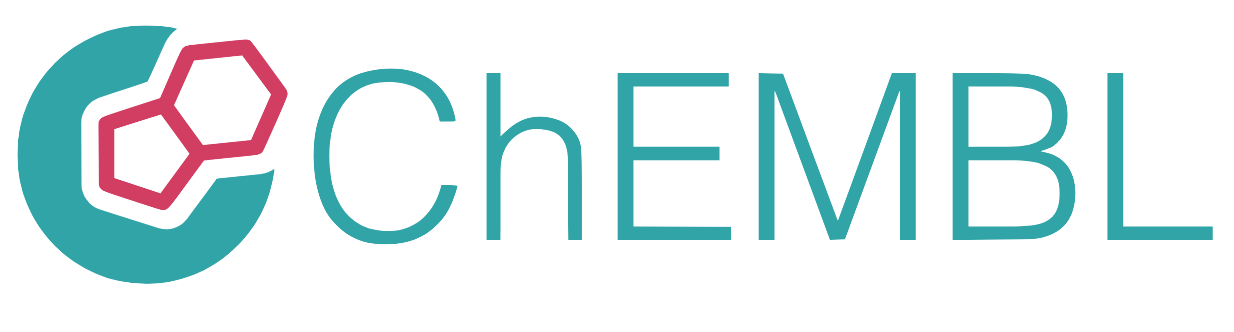

---
**Realizado por:** Raziel Cedillo
**Contacto:** brayanraziel1997@gmail.com
(Febrero 2025)

---


# **ChEMBL** (*Obtención de datos y ejemplos*)


---



Las siguientes paqueterias y herramientas quimioinformáticas nos ayudan a acceder a los datos de ChEMBL:
*   chembl_webresource_client
*   Pandas
*   RDKit


Glosario:
1. Moléculas
2. Fármacos
3. Blancos
4. Actividad
5. Ensayos
6. Tejidos
7. Células
8. Utilidades
9. Ejercicio global.
En grandes rasgos, para realizar una búsqueda en ChEMBL a través de la API sólo necesitamos tres cosas: 1) el módulo de búsqueda "new_client" 2) el **recurso disponible a emplear** y 3) la **palabra clave**, que nos permitirá aplicar un filtro, adicionalmente se pueden aplicar filtros extra.

---

# **Paqueterias**: instalación e importación
---


In [ ]:
from IPython.utils import io #Proporciona herramientas para capturar y suprimir las salidas (outputs).
import tqdm.notebook #Proporciona una barra de progreso interactiva para el notebook Jupyter.
import os, os.path, sys, random, subprocess #Proporciona funciones para interactuar con el sistema operativo, como manipular archivos y directorios.
total = 100
with tqdm.notebook.tqdm(total=total) as pbar:
    with io.capture_output() as captured:
        pbar.update(20)
        !pip install matplotlib, seaborn, pandas
        '''Librerías gráficas'''
        import matplotlib.pyplot as plt
        from IPython.display import display, SVG, HTML #Muestra gráficos SVG en el notebook
        import seaborn as sns #Librería para visualización de datos estadísticos basada en matplotlib.
        !pip install rdkit
        from rdkit import Chem
        from rdkit.Chem import Draw
        pbar.update(40)
        '''Librerias de herramientas primarias:'''
        import pandas as pd #Librería para manipulación y análisis de datos tabulares en Python.
        %config Completer.use_jedi = False
        import json #Proporciona herramientas para trabajar con datos en formato JSON.
        pbar.update(30)
        '''Busqueda en ChEMBL (API)'''
        !pip install chembl_webresource_client
        from chembl_webresource_client.new_client import new_client #Proporciona un nuevo cliente para acceder a la API de ChEMBL.
        from chembl_webresource_client.utils import utils #Proporciona funciones de utilidad para trabajar con la API de ChEMBL.
        from pathlib import Path #Proporciona manipulación de rutas de archivos como clases independientes.
        '''Montar unidad de Google Drive'''
        from google.colab import drive #Proporciona herramientas para montar y acceder a Google Drive desde Google Colab.
        drive.mount("/content/drive")
        pbar.update(10)

  0%|          | 0/100 [00:00<?, ?it/s]

---
# Versión 34
---

New Data
*   European Medicines Agency's data correspond to **EMA drugs** prior to 20 January 2023 (excluding vaccines).
*   University of Dundee: **T. cruzi** data
*   EU-OPENSCREEN dataset (**SARS-Cov2**)
*  Zimmermann Lab Biotransformation data Dec 2023 (biotransformation in 68 bacterial species and 28 bacterial communities)

Actualization of Fields:
*  *MOLECULE_DICTIONARY.ORPHAN* field has been added to indicate whether a drug has **orphan designation**.
* *MOLECULE_DICTIONARY.MOLECULE_TYPE*, now include **Antibody drug conjugate**
* *MOLECULE_DICTIONARY.PRODRUG*: a drug is a **prodrug** (=1) or not (=0)
* *MOLECULE_HIERARCHY.ACTIVE_MOLREGNO* field: its **pharmacologically active molecule**
* *BIOTHERAPEUTIC_COMPONENTS* and *BIO_COMPONENT_SEQUENCES*. The data now includes** protein and nucleic acid sequences** for INNs and USANs.
* *DRUG_INDICATION* and *INDICATION_REFS*. Include new **EMA approved drug indications**, as well as **USAN and INN clinical candidate indications**, and their mapping to **MeSH and EFO ontologies**
* *MOLECULE_DICTIONARY.MAX_PHAS*E. Include EMA approved drugs (max_phase=4 for human drugs),
USAN clinical candidate drugs (assigned as max_phase = 1 based on USAN guidance that states “Firms usually apply for a USAN when the investigational therapy is in Phase I or Phase II trials”.) and
INN clinical candidate drugs (assigned as max_phase = 2 based on INN guidance that states “As a general guide, the development of a drug should progress up to the point of clinical trials (phase II) before an application is submitted to the INN Secretariat for name selection).
* *MOLECULE_DICTIONARY.PREF_NAME.* Pref_name curation.
* *MOLECULE_SYNONYMS* now includes manually curated **Spanish** and French INN synonyms, as well as existing English INN synonyms.

* The descriptions of the drug and clinical candidate sources have been reviewed and updated to improve clarity (ie SOURCE.SRC_DESCRIPTION and *SOURCE.SRC_SHORT_NAME* for SRC_ID = {8, 9, 12, 13, 36, 41, 42, 53, 63, 66} )**

 * *FDA_ORANGE_BOOK* (src_id = 9) is now described as “FDA Approved Drug Products with Therapeutic Equivalence Evaluations (Orange Book)”,
 * *FDA_NEW_DRUGS* (src_id=12) is described as “FDA New Molecular Entity and New Therapeutic Biological Product Approvals (New FDA Drugs)”.
 * *PRODRUG_ACTIVE* (src_id=53) is now described as “Active Ingredient of a Prodrug”

* The *black_box_warning* pipeline has been updated to capture any new FDA labels up to 31st December 2023 with black box warnings for severe or life-threatening side effects.

For more, visit [ChEMBL](https://chembl.blogspot.com/2024/04/chembl-34-is-out.html?m=1).



---

# **Ejemplo y estructura de una búsqueda general.**
---


En la siguiente figura se ejemplifica visualmente una búsqueda a través de la interfaz gráfica de ChEMBL (lado izquierdo) en comparación con una realizada a través de la API (lado derecho).

En la primera sección de ambas metodologías se realiza la búsqueda de la palabra "aspirina" ("aspirin", subrayado en rosa).
En la segunda sección, se realiza la búsqueda de un identificador de ChEMBL asociado a la aspirina (CHEMBL25, subrayado en verde).


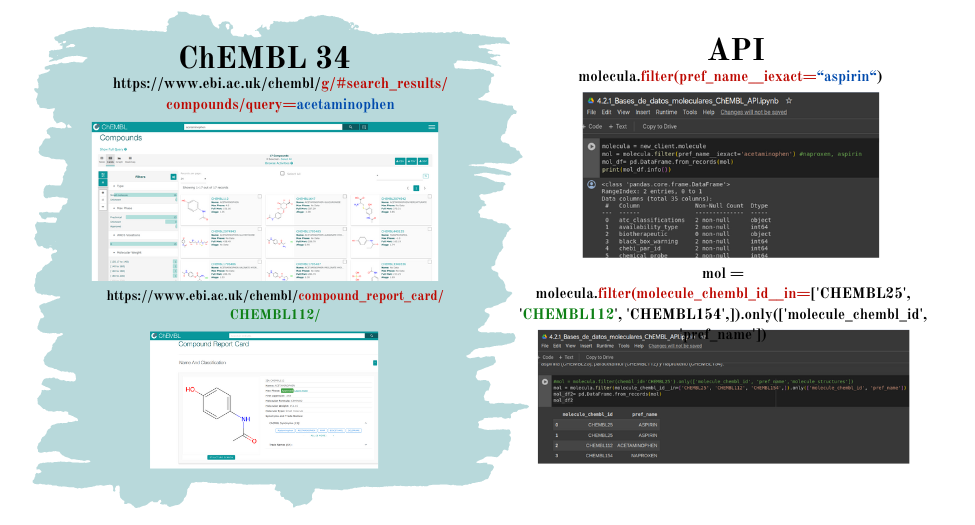

En las siguientes líneas de código se muestra como se realiza la búsqueda de la información asociada a la palabra "aspirin" en ChEMBL a través del uso de la API "new_client".

In [ ]:
molecula = new_client.molecule #Se establece el módulo a emplear (asociado al tipo de información que se recopila)
mol = molecula.filter(pref_name__iexact='aspirin') #Se filtra la información y recopila aquella que se relaciona con la palabra "aspirin"
mol_df= pd.DataFrame.from_records(mol) #Se almacena la información en una tabla
print(f"Cantidad de entradas asociadas a la etiqueta de 'aspirina': {mol_df.shape}.")
print(f"Las columnas presentes en la tabla generada son: {mol_df.columns}")
mol_df #Muestra la tabla

Cantidad de entradas asociadas a la etiqueta de 'aspirina': (2, 36).
Las columnas presentes en la tabla generada son: Index(['atc_classifications', 'availability_type', 'biotherapeutic',
       'black_box_warning', 'chebi_par_id', 'chemical_probe', 'chirality',
       'cross_references', 'dosed_ingredient', 'first_approval',
       'first_in_class', 'helm_notation', 'indication_class', 'inorganic_flag',
       'max_phase', 'molecule_chembl_id', 'molecule_hierarchy',
       'molecule_properties', 'molecule_structures', 'molecule_synonyms',
       'molecule_type', 'natural_product', 'oral', 'orphan', 'parenteral',
       'polymer_flag', 'pref_name', 'prodrug', 'structure_type',
       'therapeutic_flag', 'topical', 'usan_stem', 'usan_stem_definition',
       'usan_substem', 'usan_year', 'withdrawn_flag'],
      dtype='object')


,atc_classifications,availability_type,biotherapeutic,black_box_warning,chebi_par_id,chemical_probe,chirality,cross_references,dosed_ingredient,first_approval,...,pref_name,prodrug,structure_type,therapeutic_flag,topical,usan_stem,usan_stem_definition,usan_substem,usan_year,withdrawn_flag
0,"[B01AC06, N02BA01, N02BA51, A01AD05, N02BA71]",2,None,0,15365,0,2,"[{'xref_id': 'aspirin', 'xref_name': 'aspirin'...",True,1950,...,ASPIRIN,0,MOL,True,False,None,None,None,None,False
1,"[B01AC06, N02BA01, N02BA51, A01AD05, N02BA71]",2,None,0,15365,0,2,"[{'xref_id': 'aspirin', 'xref_name': 'aspirin'...",True,1950,...,ASPIRIN,0,MOL,True,False,None,None,None,None,False


In [ ]:
'''
Si quieres visualizar la información asociada a una columna en particular, modifica el nombre
 dentro de los corchetes por el nombre de la columna de tu interés
'''
mol_df[['cross_references']]

,cross_references
0,"[{'xref_id': 'aspirin', 'xref_name': 'aspirin'..."
1,"[{'xref_id': 'aspirin', 'xref_name': 'aspirin'..."


En el ejemplo anterior se arrojan dos entradas asociadas al input "aspirin". Esto regularmente puede pasar debido a alguna de las siguientes razones:

1. Duplicados en la base de datos: Es posible que haya múltiples entradas en la base de datos de ChEMBL que correspondan a la etiqueta indicada con información ligeramente diferente. Esto podría deberse a diferentes formas de representar la misma molécula o diferentes registros para diferentes formas o sales de la molécula.
2. Filtros de búsqueda: Es importante revisar los filtros de búsqueda que se están aplicando en el código. En el ejemplo, se está buscando la columna "pref_name" (nombre preferido) que sea igual a "aspirin" sin distinción entre mayúsculas y minúsculas. Es posible que haya múltiples entradas que cumplan con este criterio.
3. Datos actualizados: La base de datos de ChEMBL se actualiza constantemente con nueva información y registros. Puede haber diferencias en los resultados si se han realizado actualizaciones o cambios en la base de datos desde la última vez que se realizó la búsqueda.

A continuación se revisa la información contenida en la columna del identificador de ChEMBL ("ChEMBL ID") con el fin de corroborar la similitud entre la información obtenida.
Finalmente, se visualiza la molécula que se encuentra asociada a esos identificadores.

In [ ]:
#Visualizamos la información contenida en la columna de ChEMBL ID
mol_df['molecule_chembl_id']

0    CHEMBL25
1    CHEMBL25
Name: molecule_chembl_id, dtype: object

Aspirina


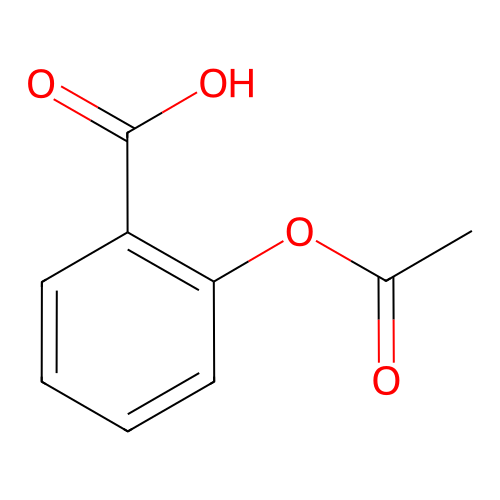

In [ ]:
imagen = new_client.image #Modulo para visualizar imágenes de moléculas
imagen.set_format('svg')
print('\033[1;30;47m' + 'Aspirina' + '\033[0m') #Formato para imprimir el nombre en negritas y sombreado
SVG(imagen.get('CHEMBL25'))

---
# **Recursos disponibles a través de la API (*endpoints*)**
---

La API de ChEMBL nos ofrece una serie de módulos, a través de los cuales se puede obtener una amplia gama de información. Esta información puede ser filtrada empleando una serie de herramientas y palabras clave que se abordarán en las siguientes secciones.

Las líneas de código que se encuentran a continuación enlistan los diferentes módulos que se pueden emplear a partir del uso de la API (columna etiquetada como '3'). En el mismo sentido, cada fila representa la estructura en programación para generar la llamada del módulo deseado en python (por ejemplo: `actividad = new_client.activity`)

In [ ]:
# Obtener los recursos disponibles en new_client
recursos = [rec for rec in dir(new_client) if not rec.startswith('_')]
# Crear un DataFrame con los recursos disponibles
recursos_disponibles = pd.DataFrame({'1': ['new_client'] * len(recursos),
                                     '2': ['.'] * len(recursos),
                                     '3': recursos,
                                     '4': [f"https://www.ebi.ac.uk/chembl/api/data/{rec}/schema" for rec in recursos]
                                    })
# Reordenar las columnas del DataFrame
recursos_disponibles = recursos_disponibles[['1', '2', '3', '4']]
# Convertir el DataFrame a formato HTML
html = recursos_disponibles.to_html(render_links=True, escape=False)
# Mostrar el DataFrame en formato HTML
HTML(html)

,1,2,3,4
0,new_client,.,activity,https://www.ebi.ac.uk/chembl/api/data/activity/schema
1,new_client,.,activity_supplementary_data_by_activity,https://www.ebi.ac.uk/chembl/api/data/activity_supplementary_data_by_activity/schema
2,new_client,.,assay,https://www.ebi.ac.uk/chembl/api/data/assay/schema
3,new_client,.,assay_class,https://www.ebi.ac.uk/chembl/api/data/assay_class/schema
4,new_client,.,atc_class,https://www.ebi.ac.uk/chembl/api/data/atc_class/schema
5,new_client,.,binding_site,https://www.ebi.ac.uk/chembl/api/data/binding_site/schema
6,new_client,.,biotherapeutic,https://www.ebi.ac.uk/chembl/api/data/biotherapeutic/schema
7,new_client,.,cell_line,https://www.ebi.ac.uk/chembl/api/data/cell_line/schema
8,new_client,.,chembl_id_lookup,https://www.ebi.ac.uk/chembl/api/data/chembl_id_lookup/schema
9,new_client,.,chembl_release,https://www.ebi.ac.uk/chembl/api/data/chembl_release/schema


Puedes consultar el esquema por cada endpoint considerando la siguiente estructura:

**https://www.ebi.ac.uk/chembl/api/data/X/schema**

Intercambiando la X por cualquier endpoint.
ejemplo: https://www.ebi.ac.uk/chembl/api/data/tissue/schema

\Podemos visualizar que existen 34 módulos diferentes que nos arrojan información particular y enfocada.


In [ ]:
def information_of_resource(resource):
    #Nomre del recurso
    for valor in resource.keys():
        print(valor)
# Suponiendo que new_client.molecule[0] ya está definido
information_of_resource(new_client.molecule[0])

atc_classifications
availability_type
biotherapeutic
black_box_warning
chebi_par_id
chemical_probe
chirality
cross_references
dosed_ingredient
first_approval
first_in_class
helm_notation
indication_class
inorganic_flag
max_phase
molecule_chembl_id
molecule_hierarchy
molecule_properties
molecule_structures
molecule_synonyms
molecule_type
natural_product
oral
orphan
parenteral
polymer_flag
pref_name
prodrug
structure_type
therapeutic_flag
topical
usan_stem
usan_stem_definition
usan_substem
usan_year
withdrawn_flag


In [ ]:
print(json.dumps(new_client.molecule[0], indent=5))

{
     "atc_classifications": [],
     "availability_type": -1,
     "biotherapeutic": null,
     "black_box_warning": 0,
     "chebi_par_id": null,
     "chemical_probe": 0,
     "chirality": -1,
     "cross_references": [],
     "dosed_ingredient": false,
     "first_approval": null,
     "first_in_class": -1,
     "helm_notation": null,
     "indication_class": null,
     "inorganic_flag": -1,
     "max_phase": null,
     "molecule_chembl_id": "CHEMBL6329",
     "molecule_hierarchy": {
          "active_chembl_id": "CHEMBL6329",
          "molecule_chembl_id": "CHEMBL6329",
          "parent_chembl_id": "CHEMBL6329"
     },
     "molecule_properties": {
          "alogp": "2.11",
          "aromatic_rings": 3,
          "cx_logd": "2.69",
          "cx_logp": "3.63",
          "cx_most_apka": "6.48",
          "cx_most_bpka": null,
          "full_molformula": "C17H12ClN3O3",
          "full_mwt": "341.75",
          "hba": 5,
          "hba_lipinski": 6,
          "hbd": 1,
       

---
# **Filtros disponibles (palabras clave)**
---
Existe una amplia variedad de filtros para el módulo "new_client" que nos permiten afinar las búsquedas a partir de palabras clave, las cuales son:

*   ***iexact***. Permite realizar una búsqueda sin distinguir entre mayúsculas y minúsculas.
*   ***contains***. Busca objetos que contengan un valor específico.
 *   ***icontains***. Similar a contains, pero sin distinguir entre mayúsculas y minúsculas.
*   ***in***. Busca objetos cuyo valor esté dentro de una lista de valores.

---------------------Comparaciones numéricas---------------------
 * ***gt*** (mayor que)
  * ***gte*** (mayor o igual que)
 * ***lt*** (menor que)
  * ***lte*** (menor o igual que).

----------------Comparaciones de cadena de texto----------------
 *   ***startswith***. Comienza con.
  *   ***istartswith***. Comienza con, sin distinguir entre mayúsculas y minúsculas.
 *   ***endswith***. Termina con.
  *   ***iendswith***. Termina con, sin distinguir entre mayúsculas y minúsculas.

*   ***range***. Permite buscar objetos cuyo valor esté dentro de un rango específico.
*   ***isnull***. Permite buscar objetos que tengan un campo nulo (True) o no (False).
*   ***regex***.  Permite realizar búsquedas utilizando expresiones regulares.(r'^[A-Za-z]+$', buscará objetos cuyo nombre consiste solo de letras).
 *   ***iregex***. Similar a regex, pero sin distinguir entre mayúsculas y minúsculas en la búsqueda.
----------------------------------------------------------------------
Lo anterior se permite debido a que esta API se encuentra construido a partir de Django (https://docs.djangoproject.com/en/1.11/ref/models/querysets).


## ***Doble guión bajo: __***
Es usado para emplear las palabras claves para afinar la búsqueda.

## ***Operador: only***
Only es un método que limita los resultados con base en un conjunto seleccionado de campos para una base de datos. Este método toma una lista de campos (como un solo argumento) para ser incluidos en los resultados. Al usar only se hace un llamamiento a la API de forma rápida debido a que se toma una menor cantidad de información.
Nota: cualquier campo especificado ignorará los campos anidados ("logP" es equivalente a "propiedades moleculares")


---
# ***1. Moléculas***
---

Este modulo (*molecule*) usualmente tienen asociados datos de bioactividad.
A continuacuión se presenta una definición que nos proporciona la información englobada (nombres de columnas) dentro de un submodulo de interés. El nombre de estas columnas puede ser empleado como filtro de busquéda.




In [ ]:
def information_of_resource(resource):
    for valor in resource.keys():
        print(valor)

# Suponiendo que new_client.molecule[0] ya está definido
information_of_resource(new_client.molecule[0])

{'atc_classifications': [], 'availability_type': -1, 'biotherapeutic': None, 'black_box_warning': 0, 'chebi_par_id': None, 'chemical_probe': 0, 'chirality': -1, 'cross_references': [], 'dosed_ingredient': False, 'first_approval': None, 'first_in_class': -1, 'helm_notation': None, 'indication_class': None, 'inorganic_flag': -1, 'max_phase': None, 'molecule_chembl_id': 'CHEMBL6329', 'molecule_hierarchy': {'active_chembl_id': 'CHEMBL6329', 'molecule_chembl_id': 'CHEMBL6329', 'parent_chembl_id': 'CHEMBL6329'}, 'molecule_properties': {'alogp': '2.11', 'aromatic_rings': 3, 'cx_logd': '2.69', 'cx_logp': '3.63', 'cx_most_apka': '6.48', 'cx_most_bpka': None, 'full_molformula': 'C17H12ClN3O3', 'full_mwt': '341.75', 'hba': 5, 'hba_lipinski': 6, 'hbd': 1, 'hbd_lipinski': 1, 'heavy_atoms': 24, 'molecular_species': 'ACID', 'mw_freebase': '341.75', 'mw_monoisotopic': '341.0567', 'np_likeness_score': '-1.56', 'num_lipinski_ro5_violations': 0, 'num_ro5_violations': 0, 'psa': '84.82', 'qed_weighted': '0

## Búsqueda por:

### ***Nombre exacto***
A continuación se realizará la búsqueda a partir del nombre exacto de un fármaco común (acetaminofén).


*   Módulo = ***molecule***
*   Palabra clave= ***iexact***



In [ ]:
molecula = new_client.molecule
mol = molecula.filter(pref_name__iexact='acetaminophen') #naproxen, aspirin
mol_df= pd.DataFrame.from_records(mol)
print(mol_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   atc_classifications   2 non-null      object
 1   availability_type     2 non-null      int64 
 2   biotherapeutic        0 non-null      object
 3   black_box_warning     2 non-null      int64 
 4   chebi_par_id          2 non-null      int64 
 5   chemical_probe        2 non-null      int64 
 6   chirality             2 non-null      int64 
 7   cross_references      2 non-null      object
 8   dosed_ingredient      2 non-null      bool  
 9   first_approval        2 non-null      int64 
 10  first_in_class        2 non-null      int64 
 11  helm_notation         0 non-null      object
 12  indication_class      2 non-null      object
 13  inorganic_flag        2 non-null      int64 
 14  max_phase             2 non-null      object
 15  molecule_chembl_id    2 non-null      object

In [ ]:
mol_df['molecule_structures']

0    {'canonical_smiles': 'CC(=O)Nc1ccc(O)cc1', 'mo...
1    {'canonical_smiles': 'CC(=O)Nc1ccc(O)cc1', 'mo...
Name: molecule_structures, dtype: object

#### Visualización de moléculas:
*   Módulo = ***image***

Paracetamol


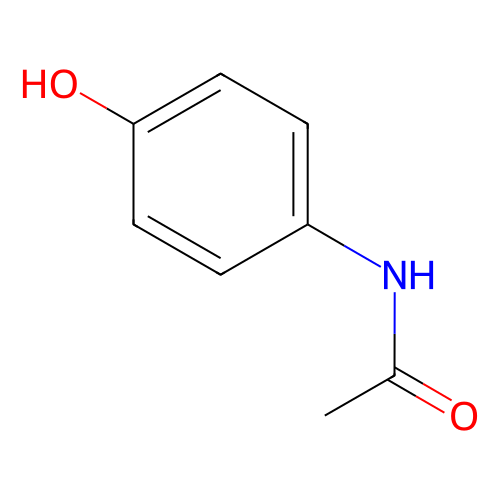

In [ ]:
imagen = new_client.image
imagen.set_format('svg')
print('\033[1;30;47m' + 'Paracetamol' + '\033[0m') #Formato de texto de la etiqueta
SVG(imagen.get('CHEMBL112'))

### ***Sinónimos***
En algunos casos es más común conocer a un compuesto por un sinónimo (módulo: *molecule_synonym*) que por su nombre preferido en ChEMBL (módulo: *pref_name*).
En este ejemplo realizaremos la búsqueda del acetaminofén a partir de su sinónimo más conocido, **paracetamol**.

*   Módulo = ***molecule***
*   Palabras clave= ***molecule_synonym***, ***istartswith***
*   Operador= ***only***



In [ ]:
mol = molecula.filter(molecule_synonyms__molecule_synonym__istartswith='parac').only('molecule_chembl_id', 'pref_name','molecule_structures', 'molecule_synonyms')
                                                                                  #'first_approval','max_phase','oral','parenteral','topical','molecule_properties')
'''molecule_synonym está anidada en molecule_synonyms.'''
mol_df1= pd.DataFrame.from_records(mol)
#Información particular como el smiles canónico o el estándar InchiKey se encuentran anidados en
#la columna 'molecule_structures' y con las siguientes líneas es posible extraer esa información.
mol_df1['canonical_smiles'] = mol_df1.loc[ mol_df1['molecule_structures'].notnull(), 'molecule_structures'].apply(lambda x: x['canonical_smiles'])
mol_df1['standard_inchi_key'] = mol_df1.loc[ mol_df1['molecule_structures'].notnull(), 'molecule_structures'].apply(lambda x: x['standard_inchi_key'])

mol_df1

,molecule_chembl_id,molecule_structures,molecule_synonyms,pref_name,canonical_smiles,standard_inchi_key
0,CHEMBL112,"{'canonical_smiles': 'CC(=O)Nc1ccc(O)cc1', 'mo...","[{'molecule_synonym': 'Abdine', 'syn_type': 'T...",ACETAMINOPHEN,CC(=O)Nc1ccc(O)cc1,RZVAJINKPMORJF-UHFFFAOYSA-N
1,CHEMBL112,"{'canonical_smiles': 'CC(=O)Nc1ccc(O)cc1', 'mo...","[{'molecule_synonym': 'Abdine', 'syn_type': 'T...",ACETAMINOPHEN,CC(=O)Nc1ccc(O)cc1,RZVAJINKPMORJF-UHFFFAOYSA-N
2,CHEMBL635,{'canonical_smiles': 'C[C@]12C=CC(=O)C=C1CC[C@...,"[{'molecule_synonym': '3en3hg4wsw', 'syn_type'...",PREDNISONE,C[C@]12C=CC(=O)C=C1CC[C@@H]1[C@@H]2C(=O)C[C@@]...,XOFYZVNMUHMLCC-ZPOLXVRWSA-N
3,CHEMBL57053,"{'canonical_smiles': 'Oc1ccc(Cl)cc1', 'molfile...","[{'molecule_synonym': 'Parachlorophenol', 'syn...",PARACHLOROPHENOL,Oc1ccc(Cl)cc1,WXNZTHHGJRFXKQ-UHFFFAOYSA-N
4,CHEMBL1196,{'canonical_smiles': 'CCCOc1ccc(C(=O)OCCN(CC)C...,"[{'molecule_synonym': 'Alcaine', 'syn_type': '...",PROPARACAINE,CCCOc1ccc(C(=O)OCCN(CC)CC)cc1N,KCLANYCVBBTKTO-UHFFFAOYSA-N
5,CHEMBL398440,"{'canonical_smiles': 'Cc1cc(O)cc(C)c1Cl', 'mol...","[{'molecule_synonym': 'Chloroxylenol', 'syn_ty...",CHLOROXYLENOL,Cc1cc(O)cc(C)c1Cl,OSDLLIBGSJNGJE-UHFFFAOYSA-N
6,CHEMBL1200464,{'canonical_smiles': 'CCCOc1ccc(C(=O)OCCN(CC)C...,"[{'molecule_synonym': 'Ak-taine', 'syn_type': ...",PROPARACAINE HYDROCHLORIDE,CCCOc1ccc(C(=O)OCCN(CC)CC)cc1N.Cl,BFUUJUGQJUTPAF-UHFFFAOYSA-N
7,CHEMBL1410743,"{'canonical_smiles': 'CC1OC(C)OC(C)O1', 'molfi...","[{'molecule_synonym': '2,4,6-trimethyl-s-triox...",PARALDEHYDE,CC1OC(C)OC(C)O1,SQYNKIJPMDEDEG-UHFFFAOYSA-N


Comparar información obtenida con la información arrojada a través de la interfaz gráfica de ChEMBL ([Clic aquí](https://www.ebi.ac.uk/chembl/compound_report_card/CHEMBL112/))

### ***ChEMBL ID***
*   Módulo = ***molecule***
*   Palabra clave= ***in***
*   Operador= ***only***

ChEMBL ID: identificador estable diseñado para una búsqueda directa de datos ([click aquí](**https**://www.ebi.ac.uk/chembl/)).

Está búsqueda se puede realizar a partir de un solo o  múltiples identificadores. Para este ejemplo se consideran los identificadores para la aspirina (CHEMBL25), paracetamol (CHEMBL112) y naproxeno (CHEMBL154).


In [ ]:
#mol = molecula.filter(chembl_id='CHEMBL25').only(['molecule_chembl_id', 'pref_name','molecule_structures'])
molecula = new_client.activity
mol = molecula.filter(molecule_chembl_id__in=['CHEMBL162783'])#.only(['molecule_chembl_id', 'pref_name'])
mol_df2= pd.DataFrame.from_records(mol)
print(mol_df2.columns)
print(len(mol_df2['document_chembl_id'].unique()))
print(mol_df2['document_chembl_id'].unique())

Index(['action_type', 'activity_comment', 'activity_id', 'activity_properties',
       'assay_chembl_id', 'assay_description', 'assay_type',
       'assay_variant_accession', 'assay_variant_mutation', 'bao_endpoint',
       'bao_format', 'bao_label', 'canonical_smiles', 'data_validity_comment',
       'data_validity_description', 'document_chembl_id', 'document_journal',
       'document_year', 'ligand_efficiency', 'molecule_chembl_id',
       'molecule_pref_name', 'parent_molecule_chembl_id', 'pchembl_value',
       'potential_duplicate', 'qudt_units', 'record_id', 'relation', 'src_id',
       'standard_flag', 'standard_relation', 'standard_text_value',
       'standard_type', 'standard_units', 'standard_upper_value',
       'standard_value', 'target_chembl_id', 'target_organism',
       'target_pref_name', 'target_tax_id', 'text_value', 'toid', 'type',
       'units', 'uo_units', 'upper_value', 'value'],
      dtype='object')
7
['CHEMBL1136596' 'CHEMBL1138185' 'CHEMBL1201862' 'CHEMBL

### ***Inchi Key standar***

*   Módulo = ***molecule***
*   Palabra clave= ***standard_inchi_key***
*   Operador= ***only***

In [ ]:
mol = molecula.filter(molecule_structures__standard_inchi_key='RZVAJINKPMORJF-UHFFFAOYSA-N').only(['molecule_chembl_id', 'pref_name', 'molecule_structures'])
mol_df3= pd.DataFrame.from_records(mol)
mol_df3

,molecule_chembl_id,molecule_structures,pref_name
0,CHEMBL112,"{'canonical_smiles': 'CC(=O)Nc1ccc(O)cc1', 'mo...",ACETAMINOPHEN
1,CHEMBL112,"{'canonical_smiles': 'CC(=O)Nc1ccc(O)cc1', 'mo...",ACETAMINOPHEN


### ***SMILES***
*   Módulo = ***molecule***
*   Palabra clave= ***canonical_smiles***
*   Operador= ***only**

In [ ]:
#CC(=O)Nc1ccc(O)cc1
lista=['Cc1cc(nc(N)n1)N1CCN(Cc2cc(CN3CCCC3)cs2)CC1', 'CCN1CC(NC(=O)C2=CC3=C(N2)C=CC(Cl)=C3)[C@H](C1)OC', 'CC1=C(C)N=CC(CNC(=O)C(N2CCCCC2)C2=CC=C(F)C=C2)=C1']
for i in lista:
  mol = molecula.filter(molecule_structures__canonical_smiles=i)
  print(mol)

[]
[]
[]


In [ ]:
import pandas as pd

# Lista de SMILES
lista = ['Cc1cc(nc(N)n1)N1CCN(Cc2cc(CN3CCCC3)cs2)CC1',
         'CCN1CC(NC(=O)C2=CC3=C(N2)C=CC(Cl)=C3)[C@H](C1)OC',
         'CC1=C(C)N=CC(CNC(=O)C(N2CCCCC2)C2=CC=C(F)C=C2)=C1']

# Filtrar por SMILES y seleccionar columnas específicas
mol = molecula.filter(molecule_structures__canonical_smiles__in=lista).only(['molecule_chembl_id', 'pref_name', 'molecule_structures'])

# Crear DataFrame a partir de los resultados
mol_df = pd.DataFrame.from_records(mol)

# Mostrar el DataFrame resultante
mol_df


HttpApplicationError: Error for url https://www.ebi.ac.uk/chembl/api/data/molecule.json, server response: {"error_message": "'list' object has no attribute 'replace'", "traceback": "Traceback (most recent call last):\n\n  File \"/chembl_ws_py3/src/chembl_webservices/core/resource.py\", line 274, in wrapper\n    response = callback(request, *args, **kwargs)\n\n  File \"/usr/local/lib/python3.9/site-packages/tastypie/resources.py\", line 467, in dispatch_list\n    return self.dispatch('list', request, **kwargs)\n\n  File \"/chembl_ws_py3/src/chembl_webservices/core/resource.py\", line 904, in dispatch\n    response = method(request, **kwargs)\n\n  File \"/chembl_ws_py3/src/chembl_webservices/core/resource.py\", line 839, in get_list\n    return self.response(self.get_list_impl)(request, **kwargs)\n\n  File \"/chembl_ws_py3/src/chembl_webservices/core/resource.py\", line 744, in get_something\n    ret = f(request, basic_bundle, **kwargs)\n\n  File \"/chembl_ws_py3/src/chembl_webservices/core/resource.py\", line 834, in get_list_impl\n    request, base_bundle, **self.remove_api_resource_names(kwargs))\n\n  File \"/chembl_ws_py3/src/chembl_webservices/resources/molecule.py\", line 504, in remove_api_resource_names\n    decoded_kwargs = self.decode_plus(kwargs)\n\n  File \"/chembl_ws_py3/src/chembl_webservices/resources/molecule.py\", line 493, in decode_plus\n    return {k: v.replace(' ', '+') if (isinstance(k, str)\n\n  File \"/chembl_ws_py3/src/chembl_webservices/resources/molecule.py\", line 493, in <dictcomp>\n    return {k: v.replace(' ', '+') if (isinstance(k, str)\n\nAttributeError: 'list' object has no attribute 'replace'\n"}

### ***Similitud, considerando:***


#### ***SMILES***
*   Módulo = ***similarity*** (métrica empleada: coeficiente de tanimoto)
*   Operador= ***only***


In [ ]:
similarity = new_client.similarity
res = similarity.filter(smiles="CC(=O)Nc1ccc(O)cc1", similarity=90).only(['molecule_chembl_id', 'similarity'])
for i in res:
    print(i)

{'molecule_chembl_id': 'CHEMBL112', 'similarity': '100'}


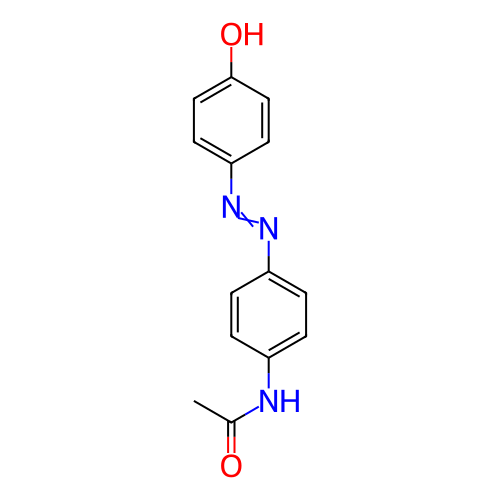

In [ ]:
imagen.set_format('svg')
SVG(imagen.get('CHEMBL1360012'))
#SVG(image.get('CHEMBL112'))

#### ***ChEMBL ID***

*   Módulo = ***similarity***
*   Operador= ***only***


Molecule ChEMBL ID: CHEMBL112
Preferred Name: ACETAMINOPHEN
Similarity: 76.9230782985687255859375


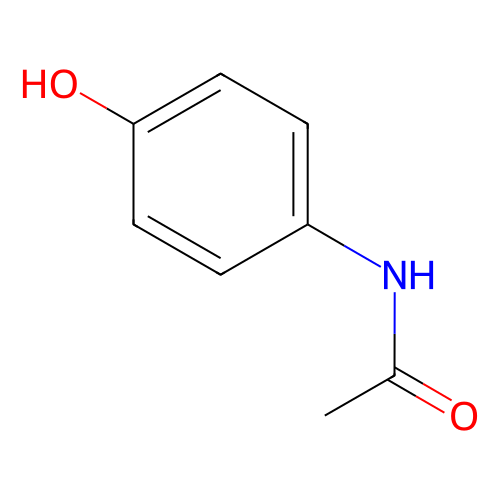



Molecule ChEMBL ID: CHEMBL1483163
Preferred Name: None
Similarity: 73.33333492279052734375


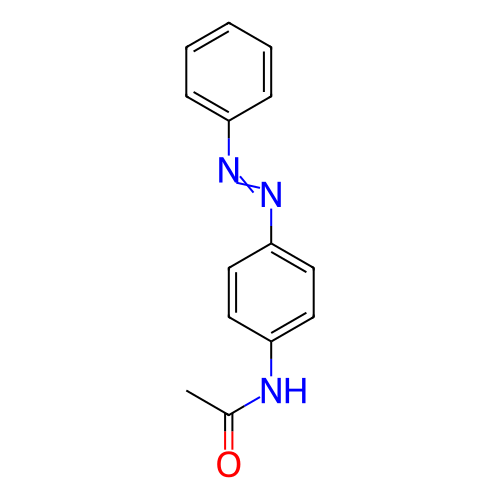



Molecule ChEMBL ID: CHEMBL311003
Preferred Name: None
Similarity: 73.33333492279052734375


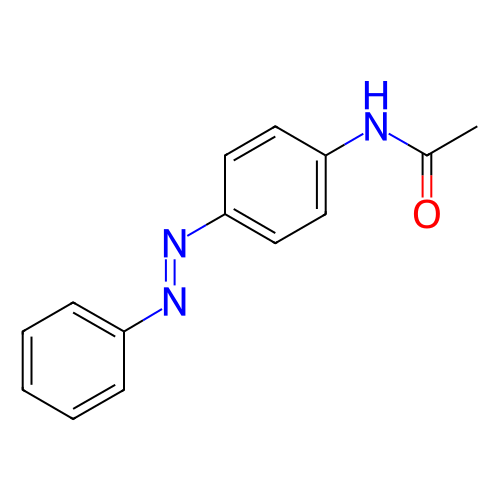



Molecule ChEMBL ID: CHEMBL3228071
Preferred Name: None
Similarity: 63.636362552642822265625


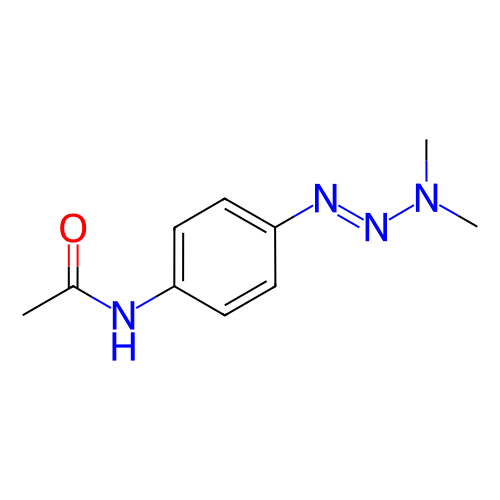



Molecule ChEMBL ID: CHEMBL82053
Preferred Name: None
Similarity: 61.1111104488372802734375


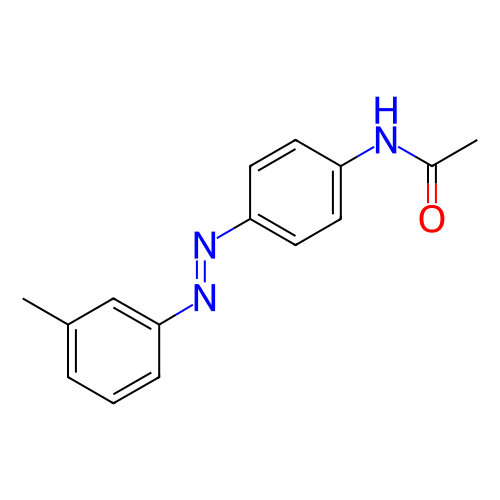



Molecule ChEMBL ID: CHEMBL1590721
Preferred Name: None
Similarity: 60.5263173580169677734375


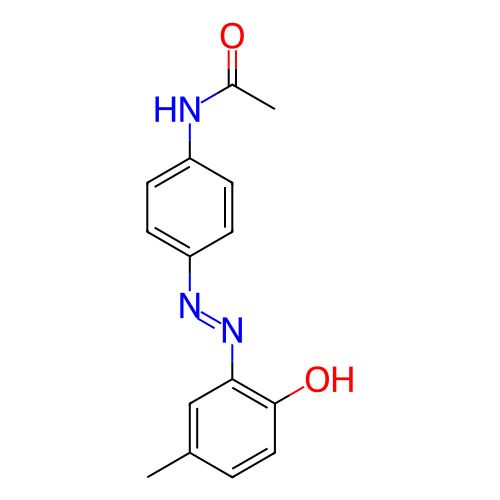

,molecule_chembl_id,pref_name,similarity,svg_image
0,CHEMBL112,ACETAMINOPHEN,76.9230782985687255859375,<?xml version='1.0' encoding='iso-8859-1'?>\n<...
1,CHEMBL1483163,None,73.33333492279052734375,<?xml version='1.0' encoding='iso-8859-1'?>\n<...
2,CHEMBL311003,None,73.33333492279052734375,<?xml version='1.0' encoding='iso-8859-1'?>\n<...
3,CHEMBL3228071,None,63.636362552642822265625,<?xml version='1.0' encoding='iso-8859-1'?>\n<...
4,CHEMBL82053,None,61.1111104488372802734375,<?xml version='1.0' encoding='iso-8859-1'?>\n<...
5,CHEMBL1590721,None,60.5263173580169677734375,<?xml version='1.0' encoding='iso-8859-1'?>\n<...


In [ ]:
import pandas as pd
from IPython.display import display, SVG

res = similarity.filter(chembl_id='CHEMBL1360012',similarity=60).only(['molecule_chembl_id', 'pref_name', 'similarity'])
# Crear una lista para almacenar los datos
data = []

# Iterar sobre los resultados y almacenar la información en la lista
for result in res:
    imagen.set_format('svg')

    molecule_id = result['molecule_chembl_id']
    pref_name = result['pref_name']
    similarity = result['similarity']
    svg_image = imagen.get(molecule_id)
    data.append({'molecule_chembl_id': molecule_id,
                 'pref_name': pref_name,
                 'similarity': similarity,
                 'svg_image': svg_image})

# Crear un DataFrame a partir de la lista de datos
df = pd.DataFrame(data)

# Iterar sobre el DataFrame y mostrar las imágenes SVG
for index, row in df.iterrows():
    print(f"Molecule ChEMBL ID: {row['molecule_chembl_id']}")
    print(f"Preferred Name: {row['pref_name']}")
    print(f"Similarity: {row['similarity']}")
    display(SVG(row['svg_image']))
    print("\n")

# Mostrar el DataFrame
df


### ***Conectividad***
Las siguientes líneas de código identifican moléculas que tengan una conectividad similar a una representación molecular (SMILES) de referencia.
*   Módulo = ***molecule***
*   Palabra clave= ***canonical_smiles***, ***connectivity***
*   Operador= ***only***

In [ ]:
res = molecula.filter(molecule_structures__canonical_smiles__connectivity='CN(C)C(=N)N=C(N)N').only(['molecule_chembl_id', 'pref_name', 'molecule_structures'])
mol_df5= pd.DataFrame.from_records(res)
mol_df5['canonical_smiles'] = mol_df5.loc[ mol_df5['molecule_structures'].notnull(), 'molecule_structures'].apply(lambda x: x['canonical_smiles'])
mol_df5
#CN(C)C(=N)N=C(N)N, CC(=O)NC1=CC=C(C=C1)

,molecule_chembl_id,molecule_structures,pref_name,canonical_smiles
0,CHEMBL1431,"{'canonical_smiles': 'CN(C)C(=N)NC(=N)N', 'mol...",METFORMIN,CN(C)C(=N)NC(=N)N
1,CHEMBL1431,"{'canonical_smiles': 'CN(C)C(=N)NC(=N)N', 'mol...",METFORMIN,CN(C)C(=N)NC(=N)N
2,CHEMBL1703,"{'canonical_smiles': 'CN(C)C(=N)NC(=N)N.Cl', '...",METFORMIN HYDROCHLORIDE,CN(C)C(=N)NC(=N)N.Cl
3,CHEMBL3094198,{'canonical_smiles': 'CN([11CH3])C(=N)NC(=N)N'...,None,CN([11CH3])C(=N)NC(=N)N


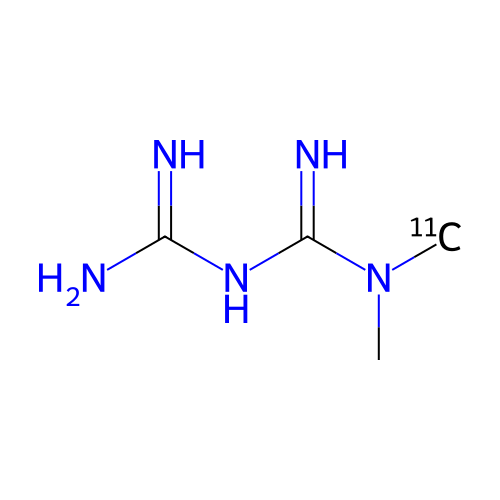

In [ ]:
imagen.set_format('svg')
SVG(imagen.get('CHEMBL3094198'))
#SVG(image.get('CHEMBL112'))

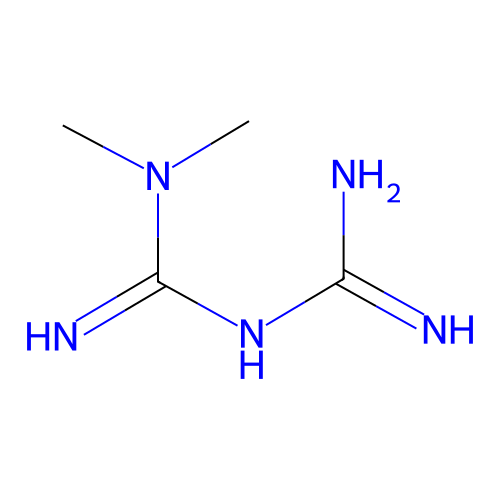

In [ ]:
imagen.set_format('svg')
SVG(imagen.get('CHEMBL1431'))
#SVG(image.get('CHEMBL112'))

### ***Subestructuras***
Las siguientes líneas de código identifican moléculas que tengan subestructuras similares a una de interes:.
*   Módulo = ***substructure***

Número de moléculas que contienen la subestructura para el SMILES C1=CC2=C(C=C1)C1=C(C=CC=C1)C=C2: 2607


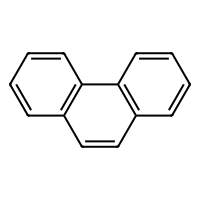

In [ ]:
substructure = new_client.substructure
smiles_list = ["C1=CC2=C(C=C1)C1=C(C=CC=C1)C=C2"]  # Fenantreno

for smiles in smiles_list:
    result = substructure.filter(smiles=smiles)
    print(f"Número de moléculas que contienen la subestructura para el SMILES {smiles}: {len(result)}")

# Crear una lista de objetos de molécula RDKit a partir de los SMILES
mol_list = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]
# Dibujar las moléculas
img = Draw.MolsToGridImage(mol_list, molsPerRow=1)
# Mostrar la imagen
display(img)

## ***Uso de Filtros***

### ***Compuestos bioterapéuticos***
Con las siguientes líneas de código se buscarán todas las moléculas bioterapeuticas.
*   Módulo = ***molecule***
*   Palabra clave= ***isnull***

In [ ]:
bioterapeuticos = molecula.filter(biotherapeutic__isnull=False)
len(bioterapeuticos)

23047

### ***MW<300***
El filtro empleado a continuación solo selecciona aquellas moléculas que tienen un peso moleculer menor a 300 kDa.

*   Módulo= ***molecule***
*   Palabra clave= ***mw_freebase***, ***lte***

In [ ]:
moleculas_ligeras = molecula.filter(molecule_properties__mw_freebase__lte=300)
len(moleculas_ligeras)

423016

### ***Filtros anidados***


*Puedes* usar varios filtros anidados separados por comas:

*   Módulo = ***molecule***
*   Palabra clave= ***mw_freebase***, ***lte***,  ***pref_name***, ***iendswith***
*   Operador= ***only***


In [ ]:
#En las siguientes líneas se buscan moléculas que contengan en su nombre preferido la terminación "INE" y un MW<300
moleculas_ligeras_nib = molecula.filter(molecule_properties__mw_freebase__lte=300,
                                        pref_name__iendswith="ine").only(['molecule_chembl_id', 'pref_name'])
mol_df6= pd.DataFrame.from_records(moleculas_ligeras_nib)
mol_df6=mol_df6.sort_values(by='pref_name').reset_index(inplace=False)
print(len(mol_df6))
mol_df6[0:10]
#an,en,in,on,un

1858


,index,molecule_chembl_id,pref_name
0,353,CHEMBL298517,(+)-EPIBATIDINE
1,870,CHEMBL501778,(+)-HIGENAMINE
2,371,CHEMBL60542,(+)-PENTAZOCINE
3,415,CHEMBL76640,(+)-PHYSOSTIGMINE
4,805,CHEMBL257990,(+)-TRANYLCYPROMINE
5,1039,CHEMBL535389,(+/-)-HOMOEPIBATIDINE
6,1796,CHEMBL2414990,(+/-)-NUCIFERINE
7,1795,CHEMBL2414988,(+/-)-ROEMREFIDINE
8,177,CHEMBL440464,(+/-)NICOTINE
9,1718,CHEMBL2236571,(-)-(S)-EDULININE


In [ ]:
print(len(mol_df6))
mol_df6[0:3]

1858


,index,molecule_chembl_id,pref_name
0,353,CHEMBL298517,(+)-EPIBATIDINE
1,870,CHEMBL501778,(+)-HIGENAMINE
2,371,CHEMBL60542,(+)-PENTAZOCINE


### ***Cumplimiento de guías de interés farmacéutico (Lipinski y Veber)***
*   Módulo = ***molecule***
*   Palabra clave= ***num_ro5_violations***


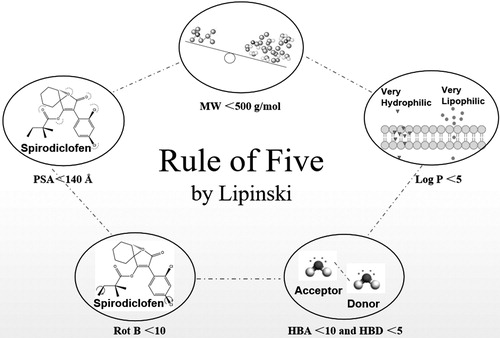

Xiaoxia Chen, Hao Li, Lichao Tian, Qinwei Li, Jinxiang Luo, and Yongqiang Zhang.
Analysis of the Physicochemical Properties of Acaricides Based on Lipinski's Rule of Five.
Journal of Computational Biology.Sep 2020.1397-1406.http://doi.org/10.1089/cmb.2019.0323

In [ ]:
sin_violaciones = molecula.filter(molecule_properties__num_ro5_violations=0)
print(f"Moléculas que no presentan violaciones a la regla de los cinco: {len(sin_violaciones)}")

Moléculas que no presentan violaciones a la regla de los cinco: 1655867


---
# ***2. Fármacos***
---
En contraste con los compuestos, los fármacos (fase 4, max_phase=4) y los candidatos clínicos (fase 1, 2 y 3) en ChEMBL normalmente tienen información curada y no tienen que tener necesariamente mediciones de bioactividad asociada.
Los datos en la API drugs se agrega dentro del parentesco del fármaco.

*   Módulo= ***drug***
*   Operador= ***only***


## ***Obtención de todos los fármacos***

In [ ]:
farmaco = new_client.drug
columnas=['development_phase','first_approval','molecule_chembl_id','synonyms',  'usan_stem','usan_stem_definition',  'usan_year']
res = farmaco.only(columnas)
farmaco_df1= pd.DataFrame.from_records(res)
farmaco_df1

,applicants,atc_code_description,development_phase,first_approval,molecule_chembl_id,research_codes,synonyms,usan_stem,usan_stem_definition,usan_year
0,None,None,4.0,1976.0,CHEMBL2,None,"[Prazosin hydrochloride (FDA, JAN, MI, USAN, U...",-azosin,antihypertensives (prazosin type),1968.0
1,None,None,4.0,1976.0,CHEMBL2,None,"[Prazosin hydrochloride (FDA, JAN, MI, USAN, U...",-azosin,antihypertensives (prazosin type),1968.0
2,None,None,4.0,1984.0,CHEMBL3,None,"[Nicotine bitartrate (MI, USAN), Nicotine bita...",None,None,1985.0
3,None,None,4.0,1990.0,CHEMBL4,None,"[Ofloxacin (BAN, FDA, INN, JAN, MI, USAN, USP), ]",-oxacin,antibacterials (quinolone derivatives),1984.0
4,None,None,4.0,1964.0,CHEMBL5,None,"[Nalidixate sodium (USAN), Nalidixic acid (BAN...",nal-,narcotic agonists/antagonists (normorphine type),1962.0
...,...,...,...,...,...,...,...,...,...,...
14801,None,None,2.0,NaN,CHEMBL5095509,None,[Ddp-225],None,None,NaN
14802,None,None,None,NaN,CHEMBL5219790,None,[Cetrimide],None,None,NaN
14803,None,None,None,NaN,CHEMBL5219942,None,[Cetrimide],None,None,NaN
14804,None,None,None,NaN,CHEMBL5219994,None,[Acriflavine],None,None,NaN


## ***Empleo de filtros***
A partir de la búsqueda anterior se considera la aplicación de filtros.
*   Módulo = ***molecule***
*   Palabra clave= ***mw_freebase***, ***lte***,  ***pref_name***, ***iendswith***
*   Operador= ***only***

#### ***Año de liberación, sinónimos y palabras clave de los sinónimos***

El "**USAN**" (United States Adopted Names) es un sistema para designar nombres genéricos para los medicamentos en los Estados Unidos. Los nombres USAN son seleccionados por la American Medical Association (**AMA**) y otras organizaciones. Un "**stem**" en este contexto se refiere a una parte común de un nombre de medicamento que indica su clase o categoría.
Corresponde a la designación de nombres genéricos de medicamentos.

In [ ]:
res = farmaco.filter(first_approval__gte=1980).filter(usan_stem="-azosin").only(['development_phase',
                                                                                 'first_approval','molecule_chembl_id',
                                                                                 'synonyms','usan_stem',
                                                                                 'usan_stem_definition','usan_year'])
farmaco_df2= pd.DataFrame.from_records(res)
farmaco_df2

,applicants,atc_code_description,development_phase,first_approval,molecule_chembl_id,research_codes,synonyms,usan_stem,usan_stem_definition,usan_year
0,None,None,4.0,1987,CHEMBL611,None,"[Terazosin (BAN, INN, MI), Terazosin hydrochlo...",-azosin,antihypertensives (prazosin type),1980
1,None,None,4.0,1987,CHEMBL611,None,"[Terazosin (BAN, INN, MI), Terazosin hydrochlo...",-azosin,antihypertensives (prazosin type),1980
2,None,None,4.0,1990,CHEMBL707,None,"[Doxazosin mesilate (JAN), Doxazosin mesylate ...",-azosin,antihypertensives (prazosin type),1981


#### ***Fase clínica máxima, clasificación [ATC](http://www.vademecumfarmacia.com/clasificacion-atc-de-medicamentos/) y año de aprobación***
A continuación se considera la búsqueda de fármacos aprobados teniendo en cuenta la fase clínica máxima 4, la denominación ATC para inmunosupresores y el año de aprobación correspondiente.
*   Módulo = ***molecule***
*   Palabra clave= ***mw_freebase, lte, pref_name, iendswith***
*   Operador= ***only***


In [ ]:
farmacos_aprobados = molecula.filter(max_phase=4, #solo fármacos aprobados
                                atc_classifications__level4='N03AA', #Clasificación ATC de ANTIEPILÉPTICOS (Barbitúricos y derivados)
                                      #level2: N03, level3: N03A, level4: N03A A
                                #first_approval__gte=2024 #Aprobados despues del 2024 )
                                ).order_by('first_approval').only(['atc_classifications','first_approval','indication_class','max_phase','pref_name','molecule_type', 'molecule_chembl_id'])
farmaco_df2= pd.DataFrame.from_records(farmacos_aprobados)
farmaco_df2

,atc_classifications,first_approval,indication_class,max_phase,molecule_chembl_id,molecule_type,pref_name
0,[N03AA03],1954.0,Anticonvulsant,4.0,CHEMBL856,Small molecule,PRIMIDONE
1,[N03AA03],1954.0,Anticonvulsant,4.0,CHEMBL856,Small molecule,PRIMIDONE
2,[N03AA30],1982.0,None,4.0,CHEMBL450,Small molecule,METHARBITAL
3,[N03AA02],NaN,"Anticonvulsant; Sedative-Hypnotic,Sedative-Hyp...",4.0,CHEMBL40,Small molecule,PHENOBARBITAL
4,[N03AA01],NaN,Anticonvulsant; Sedative-Hypnotic,4.0,CHEMBL45029,Small molecule,MEPHOBARBITAL
5,[N03AA04],NaN,None,4.0,CHEMBL3833301,Small molecule,BARBEXACLONE


## ***Identificación de:***


#### ***Moléculas considerando enfermedades***
A continuación se considera la búsqueda de fármacos que se encuentren en fase clínica 3 para una enfermedad particular, en este caso se considera al cáncer de pulmón.
*   Módulo = ***drug***
*   Palabra clave= ***indication***
*   Operador= ***only***

In [ ]:
indicacion_farmaceutica = new_client.drug_indication
cancer_pulmon_indicacion = indicacion_farmaceutica.filter(efo_term__icontains="diabetes")
cancer_pulmon_indicacion_df= pd.DataFrame.from_records(cancer_pulmon_indicacion)
print(len(cancer_pulmon_indicacion_df))
cancer_pulmon_indicacion_df[0:2]

0


""


In [ ]:
print(cancer_pulmon_indicacion_df['mesh_heading'].unique())

['Diabetes Mellitus' 'Diabetes, Gestational' 'Prediabetic State'
 'Diabetes Insipidus' 'Latent Autoimmune Diabetes in Adults'
 'Diabetes Insipidus, Neurogenic' 'Diabetes Mellitus, Type 1'
 'Diabetes Mellitus, Type 2']


In [ ]:
print(cancer_pulmon_indicacion_df['max_phase_for_ind'].unique())

['4.0' '2.0' '3.0' '1.0' '0.5' '-1.0']


In [ ]:
cancer_pulmon_fase3 = molecula.filter(molecule_chembl_id__in=[x['molecule_chembl_id'] for x in cancer_pulmon_indicacion]).only(['molecule_chembl_id','molecule_properties'])
cancer_pulmon_fase3 = pd.DataFrame(cancer_pulmon_fase3)

#Las siguientes líneas desglosan las propiedades fisicoquímicas de interés, de las moléculas que cumplen con los filtros previos.
def desglose_informacion(column_name_output='',column_name_input='' ):
  df[column_name_output]= df.loc[df[column_name_input].notnull(),column_name_input].apply(lambda x: x[column_name_output])
  return df

cancer_pulmon_fase3[0:2]

,molecule_chembl_id,molecule_properties
0,CHEMBL25,"{'alogp': '1.31', 'aromatic_rings': 1, 'cx_log..."
1,CHEMBL38,"{'alogp': '5.60', 'aromatic_rings': 0, 'cx_log..."


In [ ]:
cancer_pulmon_fase3 = molecula.filter(molecule_chembl_id__in=[x['molecule_chembl_id'] for x in cancer_pulmon_indicacion]).only(['molecule_chembl_id', 'molecule_properties'])
cancer_pulmon_fase3 = pd.DataFrame(cancer_pulmon_fase3)

# Desglosar las propiedades fisicoquímicas de interés de las moléculas que cumplen con los filtros previos
def desglose_informacion(df, column_name_output, column_name_input):
    df[column_name_output] = df[column_name_input].apply(lambda x: x.get(column_name_output) if isinstance(x, dict) else None)
    return df

# Desglosar información de las propiedades fisicoquímicas
properties_to_desglose = ['mw_freebase', 'alogp', 'aromatic_rings', 'full_molformula', 'hba', 'hbd', 'heavy_atoms',
                          'molecular_species', 'num_lipinski_ro5_violations', 'psa', 'rtb']
for property_name in properties_to_desglose:
    cancer_pulmon_fase3 = desglose_informacion(cancer_pulmon_fase3, property_name, 'molecule_properties')
cancer_pulmon_fase3

,molecule_chembl_id,molecule_properties,mw_freebase,alogp,aromatic_rings,full_molformula,hba,hbd,heavy_atoms,molecular_species,num_lipinski_ro5_violations,psa,rtb
0,CHEMBL25,"{'alogp': '1.31', 'aromatic_rings': 1, 'cx_log...",180.16,1.31,1.0,C9H8O4,3.0,1.0,13.0,ACID,0.0,63.60,2.0
1,CHEMBL38,"{'alogp': '5.60', 'aromatic_rings': 0, 'cx_log...",300.44,5.60,0.0,C20H28O2,1.0,1.0,22.0,ACID,1.0,37.30,5.0
2,CHEMBL45,"{'alogp': '1.86', 'aromatic_rings': 2, 'cx_log...",232.28,1.86,2.0,C13H16N2O2,2.0,2.0,17.0,NEUTRAL,0.0,54.12,4.0
3,CHEMBL481,"{'alogp': '4.09', 'aromatic_rings': 3, 'cx_log...",586.69,4.09,3.0,C33H38N4O6,9.0,1.0,43.0,BASE,1.0,114.20,4.0
4,CHEMBL84,"{'alogp': '1.85', 'aromatic_rings': 3, 'cx_log...",421.45,1.85,3.0,C23H23N3O5,8.0,2.0,31.0,BASE,0.0,104.89,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,CHEMBL4650483,None,None,None,NaN,None,NaN,NaN,NaN,None,NaN,None,NaN
169,CHEMBL4761468,"{'alogp': '5.31', 'aromatic_rings': 4, 'cx_log...",525.66,5.31,4.0,C30H35N7O2,8.0,2.0,39.0,BASE,2.0,87.55,11.0
170,CHEMBL4802221,None,None,None,NaN,None,NaN,NaN,NaN,None,NaN,None,NaN
171,CHEMBL5077861,"{'alogp': '5.60', 'aromatic_rings': 5, 'cx_log...",526.04,5.60,5.0,C29H28ClN7O,6.0,1.0,38.0,NEUTRAL,2.0,84.63,4.0


In [ ]:
#Las propiedades que pueden ser extraídas son las siguientes:
properties = cancer_pulmon_fase3['molecule_properties'].iloc[0]
print(json.dumps(properties, indent=4))

{
    "alogp": "1.31",
    "aromatic_rings": 1,
    "cx_logd": "-2.16",
    "cx_logp": "1.24",
    "cx_most_apka": "3.41",
    "cx_most_bpka": null,
    "full_molformula": "C9H8O4",
    "full_mwt": "180.16",
    "hba": 3,
    "hba_lipinski": 4,
    "hbd": 1,
    "hbd_lipinski": 1,
    "heavy_atoms": 13,
    "molecular_species": "ACID",
    "mw_freebase": "180.16",
    "mw_monoisotopic": "180.0423",
    "np_likeness_score": "0.12",
    "num_lipinski_ro5_violations": 0,
    "num_ro5_violations": 0,
    "psa": "63.60",
    "qed_weighted": "0.55",
    "ro3_pass": "N",
    "rtb": 2
}


### ***Mecanismo de acción***
A continuación se realiza la búsqueda de moléculas interactuantes con un blanco (receptor de insulina) y se identifica su respectivo mecanismo de acción.
*   Módulo= ***mechanism***
*   Operador= ***only***

In [ ]:
mecanismo = new_client.mechanism
res = mecanismo.filter(target_chembl_id='CHEMBL1981' #Receptor de insulina
                      ).only(['action_type','max_phase','mechanism_comment',
                              'mechanism_of_action','molecule_chembl_id', 'target_chembl_id'])
farmaco_df3= pd.DataFrame.from_records(res)
farmaco_df3

,action_type,max_phase,mechanism_comment,mechanism_of_action,molecule_chembl_id,target_chembl_id
0,AGONIST,4,None,Insulin receptor agonist,CHEMBL1201631,CHEMBL1981
1,AGONIST,4,None,Insulin receptor agonist,CHEMBL1201631,CHEMBL1981
2,AGONIST,4,None,Insulin receptor agonist,CHEMBL1201540,CHEMBL1981
3,AGONIST,4,None,Insulin receptor agonist,CHEMBL1201629,CHEMBL1981
4,AGONIST,4,None,Insulin receptor agonist,CHEMBL1201644,CHEMBL1981
5,AGONIST,4,None,Insulin receptor agonist,CHEMBL1201639,CHEMBL1981
6,AGONIST,4,None,Insulin receptor agonist,CHEMBL1201542,CHEMBL1981
7,AGONIST,4,None,Insulin receptor agonist,CHEMBL1201543,CHEMBL1981
8,AGONIST,4,None,Insulin receptor agonist,CHEMBL1201631,CHEMBL1981
9,AGONIST,4,None,Insulin receptor agonist,CHEMBL1201656,CHEMBL1981


### ***Alertas farmacéuticas***
A continuación se realiza la búsqueda de compuestos que hayan presentado algún tipo de alerta farmacéutica de interés.
*   Módulo = ***drug***
*   Palabra clave= ***warning***


In [ ]:
alerta_farmaco = new_client.drug_warning
res = alerta_farmaco.filter(warning_type='Withdrawn', warning_class='carcinogenicity') #carcinogenicity, neurotoxicity
farmaco_df4= pd.DataFrame.from_records(res)
farmaco_df4

,efo_id,efo_id_for_warning_class,efo_term,molecule_chembl_id,parent_molecule_chembl_id,warning_class,warning_country,warning_description,warning_id,warning_refs,warning_type,warning_year
0,EFO:0011046,EFO:0011046,carcinogenicity,CHEMBL110691,CHEMBL110691,carcinogenicity,United States; United Kingdom,Animal carcinogenicity (dogs),2868,"[{'ref_id': '10.1177/009286150103500134', 'ref...",Withdrawn,1970
1,EFO:0011046,EFO:0011046,carcinogenicity,CHEMBL110691,CHEMBL110691,carcinogenicity,United States; United Kingdom,Animal carcinogenicity (dogs),2868,"[{'ref_id': '10.1177/009286150103500134', 'ref...",Withdrawn,1970
2,EFO:0011046,EFO:0011046,carcinogenicity,CHEMBL44618,CHEMBL44618,carcinogenicity,United States,carcinogenic in mice and rats,2870,"[{'ref_id': '10.1021/cen-v054n016.p007', 'ref_...",Withdrawn,1976
3,EFO:0011046,EFO:0011046,carcinogenicity,CHEMBL2104489,CHEMBL2104489,carcinogenicity,Germany; Austria,Animal Carcinogenicity,2876,"[{'ref_id': 'CL12.pdf', 'ref_type': 'WHO', 're...",Withdrawn,1969
4,EFO:0011046,EFO:0011046,carcinogenicity,CHEMBL360328,CHEMBL360328,carcinogenicity,United States,Carcinogenicity,2906,[{'ref_id': 'drug-safety-and-availability/fda-...,Withdrawn,2020
5,EFO:0011046,EFO:0011046,carcinogenicity,CHEMBL16476,CHEMBL16476,carcinogenicity,United Kingdom,Animal carcinogenicity (rodent),2943,"[{'ref_id': '10.1177/009286150103500134', 'ref...",Withdrawn,1965
6,EFO:0011046,EFO:0011046,carcinogenicity,CHEMBL1788386,CHEMBL1788386,carcinogenicity,Oman,Potential risk of carcinogenicity,2953,"[{'ref_id': 'EDM-QSM-2001.3', 'ref_type': 'WHO...",Withdrawn,1997
7,EFO:0011046,EFO:0011046,carcinogenicity,CHEMBL1788403,CHEMBL1788403,carcinogenicity,Oman,Potential risk of carcinogenicity,3100,"[{'ref_id': 'EDM-QSM-2001.3', 'ref_type': 'WHO...",Withdrawn,1997
8,EFO:0009260,EFO:0011046,non-melanoma skin carcinoma,CHEMBL1863513,CHEMBL1863513,carcinogenicity,European Union; Canada,Increased risk of non-melanoma skin cancer,3121,[{'ref_id': 'recall-alert-rappel-avis/hc-sc/20...,Withdrawn,2020
9,EFO:0011046,EFO:0011046,carcinogenicity,CHEMBL53418,CHEMBL53418,carcinogenicity,United States; Canada,May have a carcinogenic potential,3126,"[{'ref_id': 'EDM-QSM-2001.3', 'ref_type': 'WHO...",Withdrawn,1997


#### ***Tipo de alerta***
Se puede realizar la búsqueda a partir de una palabra clave.
*   Módulo= ***drug***
*   Palabra clave= ***icontains***


In [ ]:
res = alerta_farmaco.filter(warning_class__icontains='cardio')#, warning_type='Black Box Warning')
farmaco_df5= pd.DataFrame.from_records(res)
farmaco_df5

,efo_id,efo_id_for_warning_class,efo_term,molecule_chembl_id,parent_molecule_chembl_id,warning_class,warning_country,warning_description,warning_id,warning_refs,warning_type,warning_year
0,None,EFO:1001482,None,CHEMBL270190,CHEMBL270190,cardiotoxicity,United States,None,81,[{'ref_id': '77a67dc6-35d3-48ff-9d18-292d4d442...,Black Box Warning,NaN
1,None,EFO:1001482,None,CHEMBL270190,CHEMBL270190,cardiotoxicity,United States,None,81,[{'ref_id': '77a67dc6-35d3-48ff-9d18-292d4d442...,Black Box Warning,NaN
2,None,EFO:1001482,None,CHEMBL1083993,CHEMBL633,cardiotoxicity,United States,None,98,[{'ref_id': '730039c2-0a32-4775-855d-98b2207e9...,Black Box Warning,NaN
3,None,EFO:1001482,None,CHEMBL501,CHEMBL405,cardiotoxicity,United States,None,109,[{'ref_id': 'f469fb38-0380-4621-9db3-a4f429126...,Black Box Warning,NaN
4,None,EFO:1001482,None,CHEMBL2362016,CHEMBL2362016,cardiotoxicity,United States,None,135,[{'ref_id': 'a482eccd-8837-47ea-904d-2f2c294d1...,Black Box Warning,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
169,EFO:1001482,EFO:1001482,cardiotoxicity,CHEMBL16080,CHEMBL16080,cardiotoxicity,United States,potentially toxic to the cardiovascular system...,3710,"[{'ref_id': 'FR-1998-10-08/html/98-26923.htm',...",Withdrawn,1977.0
170,None,EFO:1001482,None,CHEMBL4585668,CHEMBL4585668,cardiotoxicity,United States,None,3728,[],Black Box Warning,NaN
171,None,EFO:1001482,None,CHEMBL1200322,CHEMBL1508,cardiotoxicity,United States,None,3738,[],Black Box Warning,NaN
172,None,EFO:1001482,None,CHEMBL2364649,CHEMBL2364649,cardiotoxicity,United States,None,3746,[],Black Box Warning,NaN


---
# ***3. Blancos moleculares***
---
Igual que en los casos anteriores, la búsqueda de un blanco molecular se puede realizar a partir de diferentes rutas.
Para los siguientes ejemplos consideraremos a G9a, una lisin-metiltransferasa de histonas involucrada en modificaciones epigenéticas de importancia.


## ***Búsqueda a partir del:***

### ***Nombre de un gen***
*   Módulo = ***target***
*   Palabra clave= ***icontains***
*   Operador= ***only***

In [ ]:
blanco_molecular = new_client.target
gene_name = 'SET domain'
res = blanco_molecular.filter(target_synonym__icontains=gene_name)#.only(['organism', 'pref_name', 'target_type'])
for i in res:
    print(i)

{'cross_references': [{'xref_id': 'Q8WTS6', 'xref_name': None, 'xref_src': 'canSAR-Target'}, {'xref_id': 'SETD7', 'xref_name': None, 'xref_src': 'Wikipedia'}], 'organism': 'Homo sapiens', 'pref_name': 'Histone-lysine N-methyltransferase SETD7', 'species_group_flag': False, 'target_chembl_id': 'CHEMBL5523', 'target_components': [{'accession': 'Q8WTS6', 'component_description': 'Histone-lysine N-methyltransferase SETD7', 'component_id': 3815, 'component_type': 'PROTEIN', 'relationship': 'SINGLE PROTEIN', 'target_component_synonyms': [{'component_synonym': 'KIAA1717', 'syn_type': 'GENE_SYMBOL_OTHER'}, {'component_synonym': 'KMT7', 'syn_type': 'GENE_SYMBOL_OTHER'}, {'component_synonym': 'SET7', 'syn_type': 'GENE_SYMBOL_OTHER'}, {'component_synonym': 'SET9', 'syn_type': 'GENE_SYMBOL_OTHER'}, {'component_synonym': 'Synonyms=KIAA1717', 'syn_type': 'GENE_SYMBOL_OTHER'}, {'component_synonym': 'SET9 GN  ', 'syn_type': 'GENE_SYMBOL_OTHER'}, {'component_synonym': 'SETD7', 'syn_type': 'GENE_SYMBOL'

### ***Uniprot_id***
El ID de [Uniprot](https://www.uniprot.org/) para G9a es *Q96KQ7*.
*   Módulo = ***target***
*   Palabra clave= ***accession***

In [ ]:
uniprot_id = 'Q9Z148'
name = 'Epidermal growth factor receptor erbB1'
res = blanco_molecular.filter(pref_name__iexact=name).only('target_chembl_id')[0]
print(res)
act = actividad.filter(target_chembl_id=res['target_chembl_id']).filter(standard_type='IC50')
act = pd.DataFrame.from_records(act)
print(len(act))
#blancos_df1= pd.DataFrame.from_records(res)
#blancos_df1
act

{'target_chembl_id': 'CHEMBL203'}


KeyboardInterrupt: 

### ***Nombre de la proteína***
*   Módulo= ***target***
*   Palabra clave= ***accession***
*   Operador= ***only***

In [ ]:
protein_name = 'transferase'
res = blanco_molecular.filter(pref_name__icontains=protein_name).only(['organism','pref_name',
                                                                       'target_chembl_id',
                                                                       'target_type']).order_by(['pref_name','organism'])
blancos_df2= pd.DataFrame.from_records(res)
blancos_df2

,organism,pref_name,target_chembl_id,target_type
0,Homo sapiens,Cereblon/SET domain-containing protein 4,CHEMBL4742323,PROTEIN-PROTEIN INTERACTION
1,Homo sapiens,Cereblon/SET domain-containing protein 4,CHEMBL4742323,PROTEIN-PROTEIN INTERACTION


---
# ***4. Actividades***
---
Con el siguiente módulo es posible obtener toda la información asociada a la actividad reportada para un compuesto o para un blanco molecular.
A continuación se obtendrán las actividades reportadas (IC50) asociadas a un blanco.
*   Módulo = ***activity***
*   Palabra clave= ***_iexact***
*   Operador= ***only***


In [ ]:
actividad = new_client.activity
herg = blanco_molecular.filter(pref_name__iexact='hERG').only('target_chembl_id')[0] #Canal de iones K - actv elect en corazón
herg_activities = actividad.filter(target_chembl_id=herg['target_chembl_id']).filter(standard_type="IC50")
len(herg_activities)

15255

Se puede obtener todas las actividades reportadas para un blanco especifico considerando ensayos de unión (tipo B).

In [ ]:
res = actividad.filter(target_chembl_id='CHEMBL3938', assay_type='B') #,pchembl_value__isnull=False)
print(len(res))
assay_b= pd.DataFrame.from_records(res)
assay_b

471


,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,306817,[],CHEMBL649260,Inhibitory activity measured against alpha-glu...,B,None,None,BAO_0000190,...,Homo sapiens,Maltase-glucoamylase,9606,None,None,IC50,uM,UO_0000065,None,110.0
1,None,None,306817,[],CHEMBL649260,Inhibitory activity measured against alpha-glu...,B,None,None,BAO_0000190,...,Homo sapiens,Maltase-glucoamylase,9606,None,None,IC50,uM,UO_0000065,None,110.0
2,None,None,306827,[],CHEMBL649328,Compound was tested for binding affinity again...,B,None,None,BAO_0000192,...,Homo sapiens,Maltase-glucoamylase,9606,None,None,Ki,uM,UO_0000065,None,6.2
3,None,None,314789,[],CHEMBL649260,Inhibitory activity measured against alpha-glu...,B,None,None,BAO_0000190,...,Homo sapiens,Maltase-glucoamylase,9606,None,None,IC50,uM,UO_0000065,None,0.7
4,None,None,314799,[],CHEMBL649328,Compound was tested for binding affinity again...,B,None,None,BAO_0000192,...,Homo sapiens,Maltase-glucoamylase,9606,None,None,Ki,uM,UO_0000065,None,6.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,None,None,24821818,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5140338,Inhibition of human lysosomal alpha-glucosidas...,B,None,None,BAO_0000201,...,Homo sapiens,Maltase-glucoamylase,9606,None,None,INH,%,UO_0000187,None,2.9
468,None,None,24821819,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5140338,Inhibition of human lysosomal alpha-glucosidas...,B,None,None,BAO_0000201,...,Homo sapiens,Maltase-glucoamylase,9606,None,None,INH,%,UO_0000187,None,26.5
469,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24823952,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5140821,Inhibition of alpha-glucosidase (unknown origi...,B,None,None,BAO_0000190,...,Homo sapiens,Maltase-glucoamylase,9606,None,None,IC50,uM,UO_0000065,None,0.89
470,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24823953,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5140821,Inhibition of alpha-glucosidase (unknown origi...,B,None,None,BAO_0000190,...,Homo sapiens,Maltase-glucoamylase,9606,None,None,IC50,uM,UO_0000065,None,1.58


---
# ***5. Ensayos***
---
A continuación, se lleva a cabo una búsqueda de ensayos de inhibición relacionados con ADMET (tipo A), medidos en organismos específicos.


*   Módulo = ***assay***
*   Palabra clave= ***icontains***
*   Operador= ***only***

A: Ensayo de actividad.
B: Ensayo de unión.
C: Ensayo celular.
D: Ensayo de dosis-respuesta.
F: Ensayo funcional.
L: Ensayo de ligando radiactivo.
M: Ensayo metabólico.
T: Ensayo de transporte.
U: Otros tipos de ensayos.


In [ ]:
ensayo = new_client.assay
res = ensayo.filter(description__icontains='inhibit', assay_type='A',
                    assay_organism='Rattus norvegicus').only(['assay_chembl_id','assay_organism','description'])
ensayos_df1= pd.DataFrame.from_records(res)
ensayos_df1

,assay_chembl_id,assay_organism,description
0,CHEMBL884521,Rattus norvegicus,Inhibition of cytochrome P450 progesterone 15-...
1,CHEMBL884521,Rattus norvegicus,Inhibition of cytochrome P450 progesterone 15-...
2,CHEMBL615148,Rattus norvegicus,Inhibition of cytochrome P450 progesterone 16-...
3,CHEMBL615199,Rattus norvegicus,Inhibition of cytochrome P450 progesterone 2-a...
4,CHEMBL883800,Rattus norvegicus,Inhibition of progesterone 6-beta-hydroxylase ...
...,...,...,...
629,CHEMBL5157675,Rattus norvegicus,Inhibition of phosphate uptake in CRL:CD(SD) r...
630,CHEMBL5160540,Rattus norvegicus,Inhibition of CYP2C19 in rat liver microsomes ...
631,CHEMBL5160615,Rattus norvegicus,Inhibition of CYP3A4 in rat liver microsomes a...
632,CHEMBL5160616,Rattus norvegicus,Inhibition of CYP2D6 in rat liver microsomes a...


## ***Toxicidad***
A continuación se muestra cómo se pueden encontrar ensayos que evalúan algún tipo de toxicidad a través del módulo *drug_warning*.
*   Módulo = ***assay***
*   Palabra clave= ***icontains***
*   Operador= ***only***

In [ ]:
res = ensayo.filter(description__icontains='kidney').only(['assay_chembl_id', #Búsqueda de toxicidad en riñón.
                                                                               'assay_organism','description'])
ensayos_df2= pd.DataFrame.from_records(res)
ensayos_df2

,assay_chembl_id,assay_organism,description
0,CHEMBL827088,None,Percent inhibition against 11-beta-hydroxyster...
1,CHEMBL827088,None,Percent inhibition against 11-beta-hydroxyster...
2,CHEMBL615234,None,Percent inhibition against 11-beta-hydroxyster...
3,CHEMBL615699,Sus scrofa,"Percent inhibition was measured against 5,10-M..."
4,CHEMBL615700,Sus scrofa,"Percent inhibition was measured against 5,10-M..."
...,...,...,...
7060,CHEMBL5216973,Mus musculus,Toxicity in nude BALB/c nude mouse xenografted...
7061,CHEMBL5217005,Sus scrofa,Inhibition of porcine kidney DAAO using D-seri...
7062,CHEMBL5217006,Sus scrofa,Inhibition of porcine kidney DAAO using D-seri...
7063,CHEMBL5217828,Macaca fascicularis,Renal toxicity in cynomolgus monkey assessed a...


---
# ***6. Tejido***
---


## ***Búsqueda a partir de:***

### ***Uberon id***
Puedes obtener un tejido en particular usado ***Uberon id*** (UBERON es una ontologia de anatomía entre especies).

Para más información visita la siguiente [liga](https://www.ebi.ac.uk/ols/ontologies/uberon#:~:text=Uberon%20is%20an%20integrated%20cross,structure%2C%20function%20and%20developmental%20lineage).

*   Módulo = ***tissue***


In [ ]:
tejido = new_client.tissue
res = tejido.filter(uberon_id="UBERON:0000177") #Pus
ensayos_df3= pd.DataFrame.from_records(res)
ensayos_df3

,bto_id,caloha_id,efo_id,pref_name,tissue_chembl_id,uberon_id
0,None,None,None,Pus,CHEMBL3987929,UBERON:0000177
1,None,None,None,Pus,CHEMBL3987929,UBERON:0000177


### ***Nombre del tejido***
A continuación se obtiene la información de los tejidos que contienen la palabra "blood" en su nombre.
*   Palabra clave= ***istarthwith***


In [ ]:
res = tejido.filter(pref_name__icontains='bra') #Cerebro
ensayos_df4= pd.DataFrame.from_records(res)
print(len(ensayos_df4))
ensayos_df4[0:3]

41


,bto_id,caloha_id,efo_id,pref_name,tissue_chembl_id,uberon_id
0,None,None,None,Blood brain barrier,CHEMBL3987461,UBERON:0000120
1,None,None,None,Blood brain barrier,CHEMBL3987461,UBERON:0000120
2,BTO:0000142,TS-0095,EFO:0000302,Brain,CHEMBL3638188,UBERON:0000955


### ***BTO ID***
Obtener tejido por ***BTO ID*** (Ontologia de Tejidos Brenda).

Para más información visita la siguiente [liga](https://www.ebi.ac.uk/ols/ontologies/bto#:~:text=A%20structured%20controlled%20vocabulary%20for,cell%20types%20and%20cell%20cultures).


In [ ]:
res = tejido.filter(bto_id="BTO:0001307") #Estómago
ensayos_df5= pd.DataFrame.from_records(res)
print(len(ensayos_df5))
ensayos_df5[0:3]

2


,bto_id,caloha_id,efo_id,pref_name,tissue_chembl_id,uberon_id
0,BTO:0001307,TS-0980,EFO:0000837,Stomach,CHEMBL3638185,UBERON:0000945
1,BTO:0001307,TS-0980,EFO:0000837,Stomach,CHEMBL3638185,UBERON:0000945


### ***EFO ID***
Obtener tejidos por ***EFO id*** (Ontologia de Factores Experimentales).

Para más información visita la siguiente [liga](https://www.ebi.ac.uk/efo/).



In [ ]:
res = tejido.filter(efo_id="EFO:0000967") #Cuello
ensayos_df6= pd.DataFrame.from_records(res)
print(len(ensayos_df6))
ensayos_df6[0:3]

2


,bto_id,caloha_id,efo_id,pref_name,tissue_chembl_id,uberon_id
0,BTO:0000420,TS-2045,EFO:0000967,Neck,CHEMBL3987857,UBERON:0000974
1,BTO:0000420,TS-2045,EFO:0000967,Neck,CHEMBL3987857,UBERON:0000974


caloha_id: Swiss Institute for Bioinformatics CALOHA Ontology identifier for the tissue

---
# ***7. Células***
---

## ***Búsqueda a partir de:***

### ***Cellosaurus id***
Para mayor información visita la siguiente [liga](https://www.cellosaurus.org/)
*   Módulo= ***cell_line***


In [ ]:
linea_celular = new_client.cell_line
res = linea_celular.filter(cellosaurus_id="CVCL_0417") #Breast metastasis of melanoma cells
ensayos_df7= pd.DataFrame.from_records(res)
print(len(ensayos_df7))
ensayos_df7[0:3]

2


,cell_chembl_id,cell_description,cell_id,cell_name,cell_source_organism,cell_source_tax_id,cell_source_tissue,cellosaurus_id,cl_lincs_id,clo_id,efo_id
0,CHEMBL3307686,MDA-MB-435 (Breast metastasis of melanoma cells,687,MDA-MB-435,Homo sapiens,9606,Breast metastasis of melanoma cells,CVCL_0417,None,None,EFO_0001213
1,CHEMBL3307686,MDA-MB-435 (Breast metastasis of melanoma cells,687,MDA-MB-435,Homo sapiens,9606,Breast metastasis of melanoma cells,CVCL_0417,None,None,EFO_0001213


### ***Descripción***
En este caso se obtendrán células descritas como linfoma.
*   Palabra clave= ***icontains***

In [ ]:
res = linea_celular.filter(cell_description__icontains="lymphoma")
ensayos_df8= pd.DataFrame.from_records(res)
print(len(ensayos_df8))
ensayos_df8[0:3]

18


,cell_chembl_id,cell_description,cell_id,cell_name,cell_source_organism,cell_source_tax_id,cell_source_tissue,cellosaurus_id,cl_lincs_id,clo_id,efo_id
0,CHEMBL3308488,CA46 (Burkitts lymphoma cells),346,CA46,Homo sapiens,9606.0,Burkitts lymphoma cells,CVCL_1101,LCL-2017,CLO_0002168,EFO_0002124
1,CHEMBL3308488,CA46 (Burkitts lymphoma cells),346,CA46,Homo sapiens,9606.0,Burkitts lymphoma cells,CVCL_1101,LCL-2017,CLO_0002168,EFO_0002124
2,CHEMBL3308006,U-937 (Histiocytic lymphoma cells),379,U-937,Homo sapiens,9606.0,Histiocytic lymphoma cells,CVCL_0007,LCL-1125,CLO_0009465,EFO_0001257


---
# ***8. Utilidades***
---
[ChEMBL Chemoinformatic Utils](https://www.ebi.ac.uk/chembl/api/utils/docs) (también conocido como '**ChEMBL Beaker**') es un conjunto de herramientas de utilidad web que proporcionan acceso RESTful a métodos quimioinformáticos comúnmente utilizados. Muchos de ellos utilizan la biblioteca quimioinformática *RDKit*.

Incluye:
* Herramientas de estandarización de estructuras químicas (por ejemplo, verificar, obtener el padre, estandarizar; ver [Bento et al](https://github.com/chembl/ChEMBL_Structure_Pipeline).)
* Cálculo de propiedades físico-químicas (por ejemplo, peso molecular, recuento de átomos pesados, número de donantes/aceptores de enlaces de hidrógeno, número de anillos aromáticos, etc.)
* Convertidores de formato de estructuras químicas (por ejemplo, de archivo mol a SMILES, de InChI a InChIKey, etc.)
* Otras herramientas para alertas estructurales, similitud de moléculas y visualización de moléculas.

Da click en la siguiente liga para mayor información: https://chembl.gitbook.io/chembl-interface-documentation/web-services/cheminformatic-utils-web-services

## ***Convertir SMILES a CTAB***
*   Módulo = ***utils***


CTAB: es un archivo tipo mol o sdf. "Connection Table". CTAB es una representación de texto plano utilizada para describir la estructura molecular de una sustancia química.



In [ ]:
aspirina = utils.smiles2ctab('O=C(Oc1ccccc1C(=O)O)C')
aspirina

'\n     RDKit          2D\n\n 13 13  0  0  0  0  0  0  0  0999 V2000\n   -1.8012   -1.1888    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n   -1.7990   -0.1888    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -0.9320    0.3096    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n   -0.0672   -0.1922    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -0.0690   -1.1922    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    0.7960   -1.6940    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    1.6630   -1.1956    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    1.6650   -0.1956    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    0.8000    0.3062    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    0.8020    1.3060    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -0.0630    1.8078    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n    1.6690    1.8042    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n   -2.6640    0.3130    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n  1  2 

## ***Calcular...***

### ***La subestructura común máxima (MCS)***
MCS: la subestructura más grande que aparece en dos o más moléculas candidatas.
Permite encontrar la porción más significativa y compartida de las estructuras moleculares,


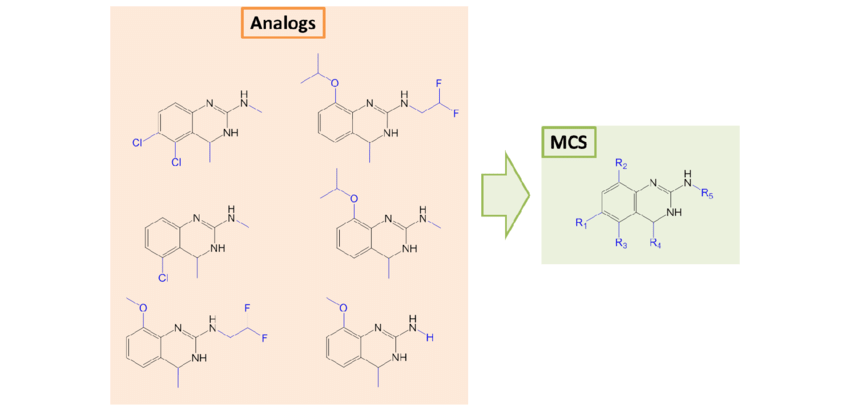

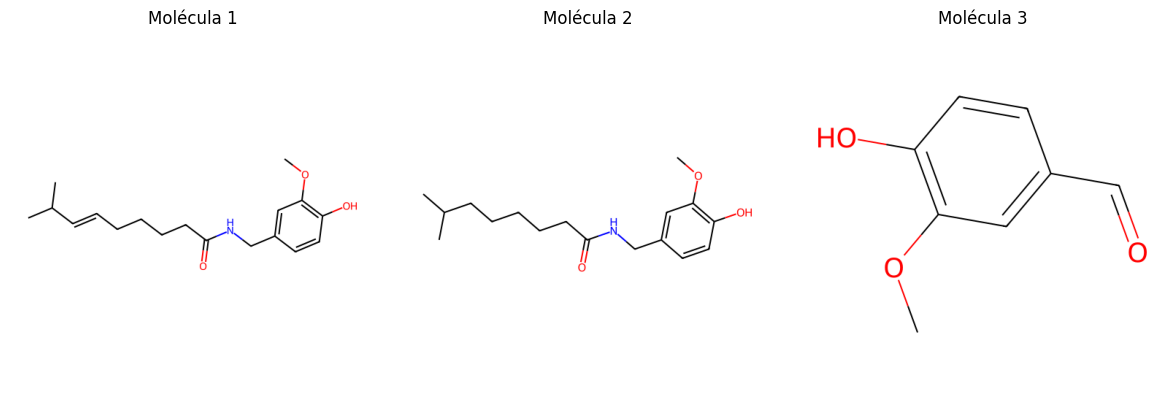

In [ ]:
smiles_list = ["O=C(NCc1cc(OC)c(O)cc1)CCCC/C=C/C(C)C",
          "CC(C)CCCCCC(=O)NCC1=CC(=C(C=C1)O)OC", "c1(C=O)cc(OC)c(O)cc1"]
'''# Crear una lista de objetos de molécula RDKit a partir de los SMILES
mol_list = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]
# Dibujar las moléculas

img = Draw.MolsToGridImage(mol_list, molsPerRow=3, maxMols=10)
# Mostrar la imagen
display(img)'''


# Crear una lista de objetos de molécula RDKit a partir de los SMILES
mol_list = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]
# Tamaño deseado para las imágenes de las moléculas
mol_size = (500, 500)
# Dibujar las moléculas y mostrarlas
fig, axes = plt.subplots(1, len(mol_list), figsize=(12, 4))

for idx, mol in enumerate(mol_list):
    # Dibujar la molécula en el subplot correspondiente
    ax = axes[idx]
    ax.imshow(Draw.MolToImage(mol, size=mol_size))
    ax.axis('off')  # Ocultar ejes
    ax.set_title(f"Molécula {idx+1}")

plt.tight_layout()  # Ajustar el espaciado entre subplots
plt.show()

[#6]1(-[#6]):[#6]:[#6](-[#8]-[#6]):[#6](:[#6]:[#6]:1)-[#8]


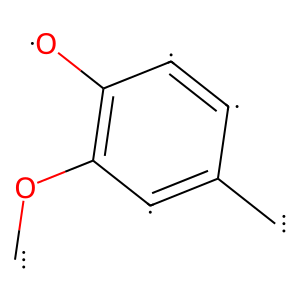

In [ ]:
mols = [utils.smiles2ctab(smile) for smile in smiles_list]
sdf = ''.join(mols)
result = utils.mcs(sdf)
print(result)
mol = Chem.MolFromSmiles(result)
# Dibujar la molécula
Draw.MolToImage(mol)

### ***Descriptores moleculares***

In [ ]:
aspirina = utils.smiles2ctab('O=C(Oc1ccccc1C(=O)O)C')
print(aspirina)


     RDKit          2D

 13 13  0  0  0  0  0  0  0  0999 V2000
   -1.8012   -1.1888    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -1.7990   -0.1888    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.9320    0.3096    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0672   -0.1922    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0690   -1.1922    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7960   -1.6940    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.6630   -1.1956    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.6650   -0.1956    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.8000    0.3062    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.8020    1.3060    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0630    1.8078    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.6690    1.8042    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -2.6640    0.3130    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  2  0
  2  3  1  0

In [ ]:
descs = json.loads(utils.chemblDescriptors(aspirina))[0]
descs

{'qed': 0.5501217966938848,
 'MolWt': 180.15899999999996,
 'TPSA': 63.60000000000001,
 'HeavyAtomCount': 13,
 'NumAromaticRings': 1,
 'NumHAcceptors': 3,
 'NumHDonors': 1,
 'NumRotatableBonds': 2,
 'MolLogP': 1.3100999999999998,
 'MolecularFormula': 'C9H8O4',
 'Ro3Pass': 0,
 'NumRo5': 0,
 'MonoisotopicMolWt': 180.042258736}

### ***Alertas estructurales***

In [ ]:
alerts = json.loads(utils.structuralAlerts(aspirina))
for a in alerts[0]:
    print(a)

{'alert_id': 1030, 'alert_name': 'Ester', 'set_name': 'MLSMR', 'smarts': '[#6]-C(=O)O-[#6]'}
{'alert_id': 1069, 'alert_name': 'vinyl michael acceptor1', 'set_name': 'MLSMR', 'smarts': '[#6]-[CH1]=C-C(=O)[#6,#7,#8]'}


### ***Molécula madre a partir de su identificador SMILES***
Remueve sales/solventes.



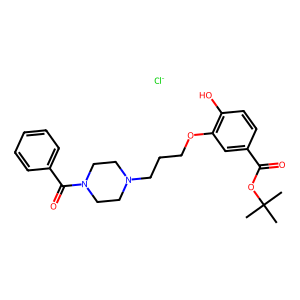

In [ ]:
smiles='CC(C)(C)OC(=O)C1=CC(=C(C=C1)O)OCCCN2CCN(CC2)C(=O)C3=CC=CC=C3.[Cl-]'
molecula= Chem.MolFromSmiles(smiles)
Draw.MolToImage(molecula)

In [ ]:
molecula_ctab = utils.smiles2ctab(smiles)
par = json.loads(utils.getParent(molecula_ctab))
par

[{'parent_molblock': '\n     RDKit          2D\n\n 32 34  0  0  0  0  0  0  0  0999 V2000\n    2.7412    5.2018    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    3.7412    5.1998    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    3.2430    6.0668    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    4.6082    5.6980    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    3.7392    4.1998    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n    2.8722    3.7016    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    2.0072    4.2032    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n    2.8702    2.7016    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    2.0030    2.2034    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    2.0012    1.2034    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    2.8662    0.7016    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    3.7332    1.1998    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    3.7350    2.1998    0.0000 C   0  0  0  0  0  0  0  0

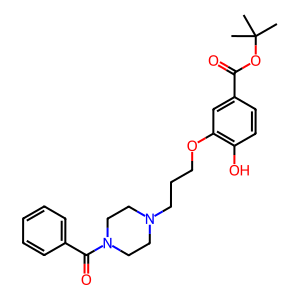

In [ ]:
# Obtener el molblock de la molécula padre
molblock = par[0]['parent_molblock']
# Convertir el molblock en una molécula RDKit
mol_parent = Chem.MolFromMolBlock(molblock)
# Dibujar la molécula
Draw.MolToImage(mol_parent)

## ***Estandarizar una molécula***

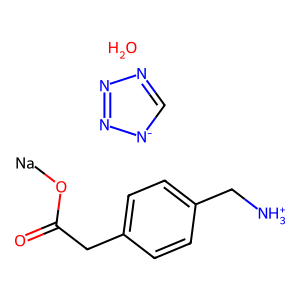

In [ ]:
smiles= '[Na]OC(=O)Cc1ccc(C[NH3+])cc1.c1nnn[n-]1.O' #'CC(C)(C)OC(=O)C1=CC(=C(C=C1)O)OCCCN2CCN(CC2)C(=O)C3=CC=CC=C3.[Cl-]'
molecula= Chem.MolFromSmiles(smiles)
Draw.MolToImage(molecula)

In [ ]:
mol = utils.smiles2ctab(smiles)
st = json.loads(utils.standardize(mol))
st

[{'standard_molblock': '\n     RDKit          2D\n\n 19 17  0  0  0  0  0  0  0  0999 V2000\n   -1.4275   -2.9831    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n   -4.9566   -0.4188    0.0000 Na  0  0  0  0  0 15  0  0  0  0  0  0\n   -4.0888   -0.9158    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n   -3.2246   -0.4126    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -3.2282    0.5874    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n   -2.3568   -0.9096    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -1.4926   -0.4064    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -0.6248   -0.9034    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    0.2394   -0.4002    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    0.2360    0.5998    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    1.1000    1.1028    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    1.9680    0.6060    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0\n   -0.6320    1.0968    0.0000 C   0  0  0  0  0  0  0 

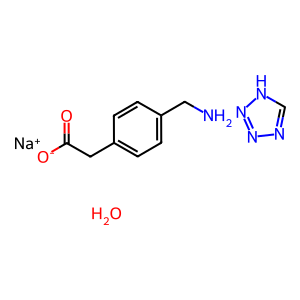

In [ ]:
# Obtener el molblock de la molécula
molblock = st[0]['standard_molblock']
# Convertir el molblock en una molécula RDKit
st_mol = Chem.MolFromMolBlock(molblock)
# Dibujar la molécula
Draw.MolToImage(st_mol)

# **Referencias y otras ligas de interés:**
1. [Servidor web de ChEMBL](https://www.ebi.ac.uk/chembl/)
2. [Esquema de ChEMBL](https://ftp.ebi.ac.uk/pub/databases/chembl/ChEMBLdb/latest/chembl_33_schema.png)
3. [Adquisición de datos de ChEMBL de TeachOpenCADD(consultarlo para mayor información)](https://projects.volkamerlab.org/teachopencadd/talktorials/T001_query_chembl.html)
4. [Script de obtención de información de ChEMBL por Leela S. Dodda](https://gist.github.com/leelasd/746f3c447805fc6ea5aad1071bd77aef)
5. [Documentación de la API de ChEMBL](https://www.ebi.ac.uk/chembl/api/utils/docs)
6. [Otros ejemplos del uso de la API](https://github.com/chembl/notebooks/blob/main/ChEMBL_API_example_for_webinar.ipynb)
